In [1]:
import sklearn
import pandas
import numpy
import joblib

print("--- KAGGLE ENVIRONMENT VERSIONS ---")
print(f"Scikit-learn: {sklearn.__version__}")
print(f"Pandas:       {pandas.__version__}")
print(f"Numpy:        {numpy.__version__}")
print(f"Joblib:       {joblib.__version__}")
print("-----------------------------------")

--- KAGGLE ENVIRONMENT VERSIONS ---
Scikit-learn: 1.2.2
Pandas:       2.2.3
Numpy:        1.26.4
Joblib:       1.5.0
-----------------------------------


In [2]:
# Core libraries for data analysis and manipulation
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for preprocessing, modeling, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Library for saving our machine learning model
import joblib

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# The dataset is located in the /kaggle/input/ directory
file_path = '/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows to understand the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# The 'TotalCharges' column has spaces for new customers. We'll treat these as missing values.
# pd.to_numeric with errors='coerce' will turn any non-numeric value into NaN (Not a Number).
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many missing values we now have
print("Missing values in TotalCharges:", df['TotalCharges'].isnull().sum())

# Since it's a very small number of rows (11), a simple strategy is to drop them.
df.dropna(inplace=True)

# We also don't need the customerID for prediction.
df.drop('customerID', axis=1, inplace=True)

print("\nData after cleaning:")
df.info()

Missing values in TotalCharges: 11

Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   obj

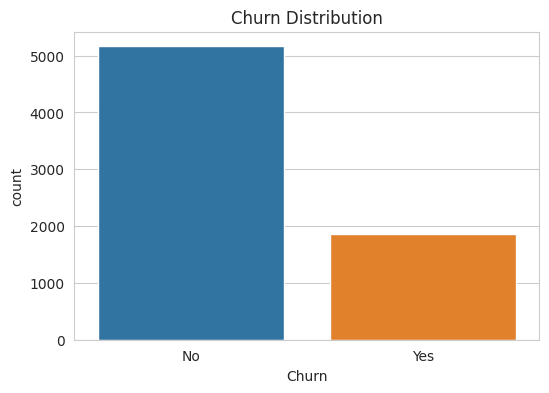

Churn Distribution:
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [6]:
# Set the plot style
sns.set_style('whitegrid')

# Plot the distribution of the Churn column
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Calculate the percentage
churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print(f"Churn Distribution:\n{churn_percentage}")

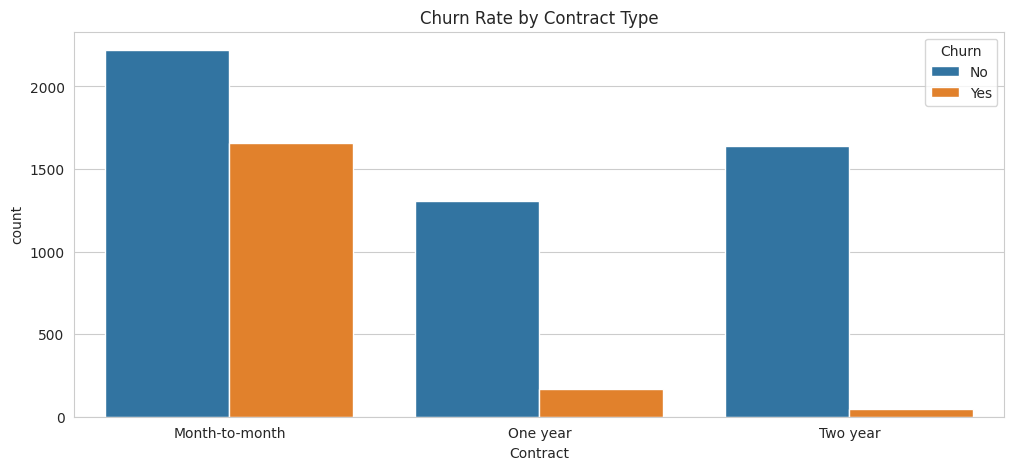

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

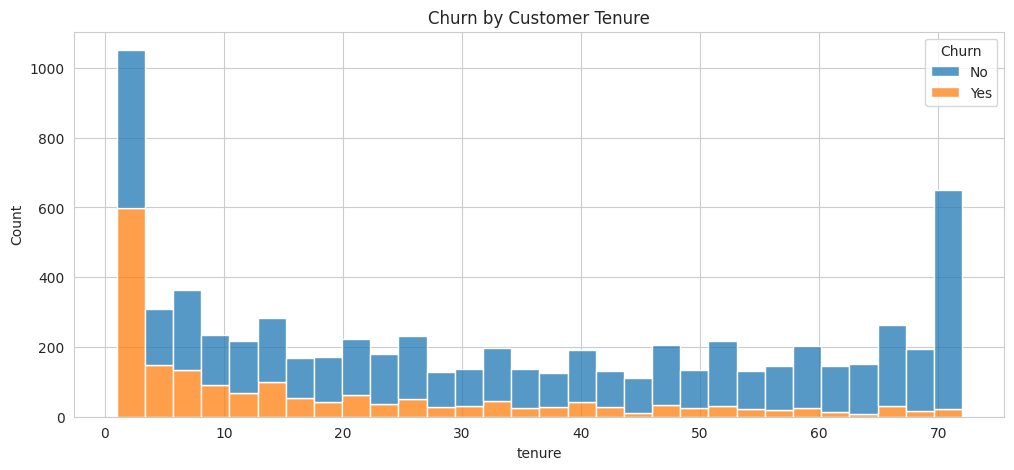

In [7]:
# Plotting categorical features against Churn
plt.figure(figsize=(12, 5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.show()

# Plotting numerical features against Churn
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Churn by Customer Tenure')
plt.show()

In [8]:
# Separate features (X) from the target (y)
X = df.drop('Churn', axis=1)
y = df['Churn'].map({'No': 0, 'Yes': 1}) # Convert target to 0s and 1s

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=np.number).columns

# Apply one-hot encoding to categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Shape of our feature matrix after encoding:", X.shape)
X.head()

Shape of our feature matrix after encoding: (7032, 30)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [9]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("Data after scaling:")
X.head()

Data after scaling:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.161694,-0.994194,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,-0.440327,0.064303,-0.260878,-0.173740,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,-0.440327,-1.239504,-0.363923,-0.959649,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,-0.440327,0.512486,-0.747850,-0.195248,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,-0.440327,-1.239504,0.196178,-0.940457,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [10]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5625, 30)
Testing set shape: (1407, 30)


In [11]:
# Initialize the RandomForestClassifier
# class_weight='balanced' helps with the imbalanced dataset
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=10)

# Train the model
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1033
           1       0.55      0.75      0.64       374

    accuracy                           0.77      1407
   macro avg       0.72      0.77      0.74      1407
weighted avg       0.80      0.77      0.78      1407


Confusion Matrix:


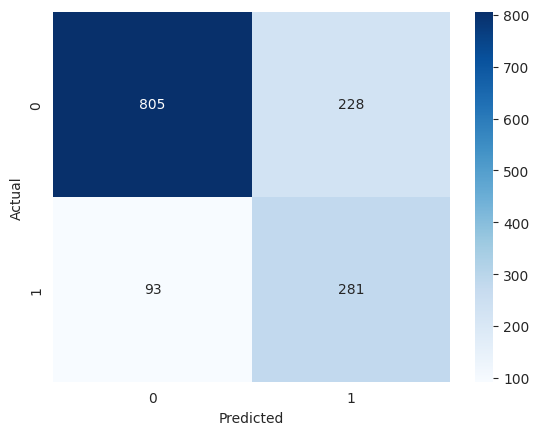

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
# We need to save the model, the scaler, and the column order
model_columns = list(X.columns)

# Create a dictionary to hold all our artifacts
artifacts = {
    'model': model,
    'scaler': scaler,
    'model_columns': model_columns
}

# Save the artifacts dictionary to a single file
joblib.dump(artifacts, 'churn_model_artifacts.joblib')

print("Artifacts saved to 'churn_model_artifacts.joblib'")
print("This is the file you will use in your Flask web application.")

Artifacts saved to 'churn_model_artifacts.joblib'
This is the file you will use in your Flask web application.


In [14]:
!pip freeze > requirements.txt